In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Track data loading
import psutil
import time

# Save&Load results
import pickle

In [2]:
import networkx as nx

import pandas as pd
import seaborn as sns

# 1. Load Data

In [3]:
st = time.time()

with open("Graphs/G_filtered.gpickle", 'rb') as f:
    G_filtered = pickle.load(f)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 1.4428028027216593 mins
RAM memory % used: 6.0
RAM Used (GB): 21.66073344


In [4]:
st = time.time()

with open("Graphs/G_original.gpickle", 'rb') as f:
    G_original = pickle.load(f)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 18.104703684647877 mins
RAM memory % used: 59.4
RAM Used (GB): 237.123350528


In [27]:
G_original.edges[(2, 1480708)] # example

{'weight': 5,
 'timeStamps': array([1663896188, 1664904542, 1664904658, 1670264155, 1670264298]),
 'newsCategories': array([4, 3, 8, 8, 4])}

# 2. Dynamics: Creators & Consumers

## 2.1. Nodes Level

In [15]:
def get_listOfNodes_creators(G):
    l = [k for k,v in dict(G.out_degree()).items() if v > 0]
    
    return l

In [16]:
def get_listOfNodes_consumers(G):
    l = [k for k,v in dict(G.in_degree()).items() if v > 0]
    
    return l

In [17]:
def nodesResults_summary(G, verbose = True):
    
    creators_list = get_listOfNodes_creators(G)
    consumers_list = get_listOfNodes_consumers(G)
    
    creatorsAndConsumers_list = list(np.intersect1d(creators_list, consumers_list))
    creatorsOnly_list = list(set(creators_list) - set(creatorsAndConsumers_list))
    consumersOnly_list = list(set(consumers_list) - set(creatorsAndConsumers_list))
    
    if verbose:
        all_nodes_num = G.number_of_nodes()
        print("The total number of nodes: ", all_nodes_num)
    
        names_list = ["Creators & Consumers", "Creators Only", "Consumers Only"]
        nodes_list = [creatorsAndConsumers_list, creatorsOnly_list, consumersOnly_list]
        
        for i in range(3):
            print(names_list[i], end = "  ")
            print("Number:", len(nodes_list[i]), end = "  ")
            print("Percentage: {:.2f}%".format(len(nodes_list[i])/all_nodes_num * 100))
    
    return creatorsAndConsumers_list, creatorsOnly_list, consumersOnly_list 

In [17]:
nodesResults_summary(G_filtered);

The total number of nodes:  767553
Creators & Consumers  Number: 66589  Percentage: 8.68%
Creators Only  Number: 633634  Percentage: 82.55%
Consumers Only  Number: 67330  Percentage: 8.77%


In [31]:
nodesResults_summary(G_original);

The total number of nodes:  13948159
Creators & Consumers  Number: 1396685  Percentage: 10.01%
Creators Only  Number: 11804579  Percentage: 84.63%
Consumers Only  Number: 746895  Percentage: 5.35%


In [41]:
767553/13948159

0.055028982677929036

## 2.2. Edges Level

In [4]:
def get_edgeNum_between_twoListOfNodes(G, l1, l2):
    
    l1_outEdges = list(G.out_edges(l1))
    l2_inEdges = list(G.in_edges(l2))

    # Finding intersection
    intersect = list(set(l1_outEdges) &  set(l2_inEdges))
    
    return len(intersect)

In [35]:
def edgesResults_summary(G):
    
    creatorsAndConsumers_list, creatorsOnly_list, consumersOnly_list = nodesResults_summary(G, verbose = False)
    
    nodes_list = [creatorsAndConsumers_list, creatorsOnly_list, consumersOnly_list]
    names_list = ["Creators & Consumers", "Creators Only", "Consumers Only"]
    pairs_list = [(1, 0), (1, 2), (0, 2), (0, 0)]
    
    all_edges_num = G.number_of_edges()
    print("The total number of edges: ", all_edges_num)
    
    for pair in pairs_list:
        edgeNum = get_edgeNum_between_twoListOfNodes(G, nodes_list[pair[0]], nodes_list[pair[1]])
        edgePercent = edgeNum/all_edges_num
        
        print(names_list[pair[0]] + " -> " + names_list[pair[1]], end = "  ")
        print("Number:", edgeNum, end = "  ")
        print("Percentage: {:.2f}%".format(edgePercent * 100))

In [36]:
edgesResults_summary(G_filtered)

The total number of edges:  2165564
Creators Only -> Creators & Consumers  Number: 1117197  Percentage: 51.59%
Creators Only -> Consumers Only  Number: 685647  Percentage: 31.66%
Creators & Consumers -> Consumers Only  Number: 102400  Percentage: 4.73%
Creators & Consumers -> Creators & Consumers  Number: 260320  Percentage: 12.02%


In [37]:
st = time.time()

edgesResults_summary(G_original)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

The total number of edges:  72331737
Creators Only -> Creators & Consumers  Number: 38334680  Percentage: 53.00%
Creators Only -> Consumers Only  Number: 6117251  Percentage: 8.46%
Creators & Consumers -> Consumers Only  Number: 2076887  Percentage: 2.87%
Creators & Consumers -> Creators & Consumers  Number: 25802919  Percentage: 35.67%
Execution time: 9.821519283453624 mins
RAM memory % used: 38.9
RAM Used (GB): 153.756872704


In [40]:
2165564/72331737

0.029939333545937103

## 2.3. Strongly Connected Components

In [64]:
def SCCs_summary(G):
    
    SCCs_lens = [len(c) for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)]
    
    print("Largest SCC Nodes Number:", SCCs_lens[0], end = "  ")
    print("Percentage: {:.2f}%".format(SCCs_lens[0]/G.number_of_nodes() * 100))
    
    print("Lengths of SCCs: ", SCCs_lens[:10])

In [65]:
SCCs_summary(G_filtered)

Largest SCC Nodes Number: 10562  Percentage: 1.38%
Lengths of SCCs:  [10562, 30, 25, 18, 17, 13, 12, 12, 12, 11]


In [66]:
st = time.time()

SCCs_summary(G_original)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Largest SCC Nodes Number: 777152  Percentage: 5.57%
Lengths of SCCs:  [777152, 110, 31, 27, 19, 19, 15, 15, 15, 14]
Execution time: 2.868616775671641 mins
RAM memory % used: 38.9
RAM Used (GB): 153.82714368


## 2.4. Weight Level

In [18]:
def get_weightSum_between_twoListOfNodes(G, l1, l2):
    
    l1_outEdges = list(G.out_edges(l1))
    l2_inEdges = list(G.in_edges(l2))

    # Finding intersection
    intersectEdgeList = list(set(l1_outEdges) &  set(l2_inEdges))
    weightList = [G.edges[edge]['weight'] for edge in intersectEdgeList]
    
    return np.sum(weightList)

In [19]:
def weightResults_summary(G):
    
    creatorsAndConsumers_list, creatorsOnly_list, consumersOnly_list = nodesResults_summary(G, verbose = False)
    
    nodes_list = [creatorsAndConsumers_list, creatorsOnly_list, consumersOnly_list]
    names_list = ["Creators & Consumers", "Creators Only", "Consumers Only"]
    pairs_list = [(1, 0), (1, 2), (0, 2), (0, 0)]
    
    all_weights_sum = G.size(weight="weight")
    print("The total sum of edge weights: ", all_weights_sum)
    
    for pair in pairs_list:
        weightCount = get_weightSum_between_twoListOfNodes(G, nodes_list[pair[0]], nodes_list[pair[1]])
        weightPercent = weightCount/all_weights_sum
        
        print(names_list[pair[0]] + " -> " + names_list[pair[1]], end = "  ")
        print("Number:", weightCount, end = "  ")
        print("Percentage: {:.2f}%".format(weightPercent * 100))

In [20]:
weightResults_summary(G_filtered)

The total sum of edge weights:  29991328.0
Creators Only -> Creators & Consumers  Number: 14655728  Percentage: 48.87%
Creators Only -> Consumers Only  Number: 9193062  Percentage: 30.65%
Creators & Consumers -> Consumers Only  Number: 1503191  Percentage: 5.01%
Creators & Consumers -> Creators & Consumers  Number: 4639347  Percentage: 15.47%


In [21]:
st = time.time()

weightResults_summary(G_original)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

The total sum of edge weights:  113685100.0
Creators Only -> Creators & Consumers  Number: 56542791  Percentage: 49.74%
Creators Only -> Consumers Only  Number: 8426580  Percentage: 7.41%
Creators & Consumers -> Consumers Only  Number: 3215597  Percentage: 2.83%
Creators & Consumers -> Creators & Consumers  Number: 45500132  Percentage: 40.02%
Execution time: 15.086822946866354 mins
RAM memory % used: 59.4
RAM Used (GB): 236.835303424


# 3. Categories

## 3.1. Generalised categories

In [22]:
newsCategory = ['CLICKBAIT', 'CONSPIRACY/JUNKSCI', 'FAKE/HOAX', 'MSM', 'NA', 'OTHER', 'POLITICAL', 'SATIRE', 'SCIENCE', 'SHADOW']
newsCateogry_dict_decode = {i:newsCategory[i] for i in range(len(newsCategory))}

- scientific

In [23]:
newsCategory[3], newsCategory[8]

('MSM', 'SCIENCE')

- fake

In [24]:
newsCategory[0], newsCategory[1], newsCategory[2]

('CLICKBAIT', 'CONSPIRACY/JUNKSCI', 'FAKE/HOAX')

- uncertain

In [25]:
newsCategory[4], newsCategory[5], newsCategory[6], newsCategory[7], newsCategory[9]

('NA', 'OTHER', 'POLITICAL', 'SATIRE', 'SHADOW')

## 3.2. Collect counts

- Ungeneralised

In [130]:
def get_newsCategoryCount(G):
    newsCategories_dict = nx.get_edge_attributes(G, 'newsCategories')
    all_newsCategories_arr = np.concatenate(np.array(list(newsCategories_dict.values())), axis = None)
    
    results = np.zeros(10, dtype = int)
    for i in range(10):
        results[i] = np.sum(all_newsCategories_arr == i)
    
    return results

In [131]:
G_filtered_newsCategoryCount = get_newsCategoryCount(G_filtered)
G_filtered_newsCategoryCount

array([  427858,   713727,  1225825, 10471968,  7893742,   605505,
        3210000,    87676,   290492,  5064535])

In [132]:
G_filtered_newsCategoryCount/np.sum(G_filtered_newsCategoryCount)

array([0.01426606, 0.02379778, 0.04087265, 0.34916653, 0.26320082,
       0.02018934, 0.10703094, 0.00292338, 0.00968587, 0.16886665])

In [133]:
st = time.time()

G_original_newsCategoryCount = get_newsCategoryCount(G_original)
print(G_original_newsCategoryCount)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

[ 1926902  1783052  5088717 40711848 29615585  2793839 12202886   258135
  1183951 18120185]
Execution time: 3.1481917262077332 mins
RAM memory % used: 58.5
RAM Used (GB): 233.546596352


In [134]:
G_original_newsCategoryCount/np.sum(G_original_newsCategoryCount)

array([0.01694947, 0.01568413, 0.04476151, 0.35811068, 0.26050542,
       0.02457524, 0.10733936, 0.00227061, 0.0104143 , 0.15938927])

- Generalised

In [146]:
def get_newsGeneralisedCategoryCount(G):
    newsCategories_dict = nx.get_edge_attributes(G, 'newsCategories')
    all_newsCategories_arr = np.concatenate(np.array(list(newsCategories_dict.values())), axis = None)
    all_generalisedNewsCategories_arr = np.array([newsCateogry_dict_generalised_code[i] for i in all_newsCategories_arr])
    
    results = np.zeros(3, dtype = int)
    for i in range(3):
        results[i] = np.sum(all_generalisedNewsCategories_arr == i)
    
    return results

In [147]:
G_filtered_newsGeneralisedCategoryCount = get_newsGeneralisedCategoryCount(G_filtered)
G_filtered_newsGeneralisedCategoryCount

array([10762460,  2367410, 16861458])

In [148]:
G_filtered_newsGeneralisedCategoryCount/np.sum(G_filtered_newsGeneralisedCategoryCount)

array([0.3588524 , 0.07893648, 0.56221112])

In [149]:
st = time.time()

G_original_newsGeneralisedCategoryCount = get_newsGeneralisedCategoryCount(G_original)
print(G_original_newsGeneralisedCategoryCount)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

[41895799  8798671 62990630]
Execution time: 3.3146264791488647 mins
RAM memory % used: 58.6
RAM Used (GB): 233.62205696


In [150]:
G_original_newsGeneralisedCategoryCount/np.sum(G_original_newsGeneralisedCategoryCount)

array([0.36852498, 0.07739511, 0.55407991])

## 3.3. Plot

- Ungeneralised

In [135]:
# Count the occurrences of each category (for reordering)
category_counts1 = {newsCategory[i]: G_original_newsCategoryCount[i] for i in range(10)}
category_counts2 = {newsCategory[i]: G_filtered_newsCategoryCount[i] for i in range(10)}

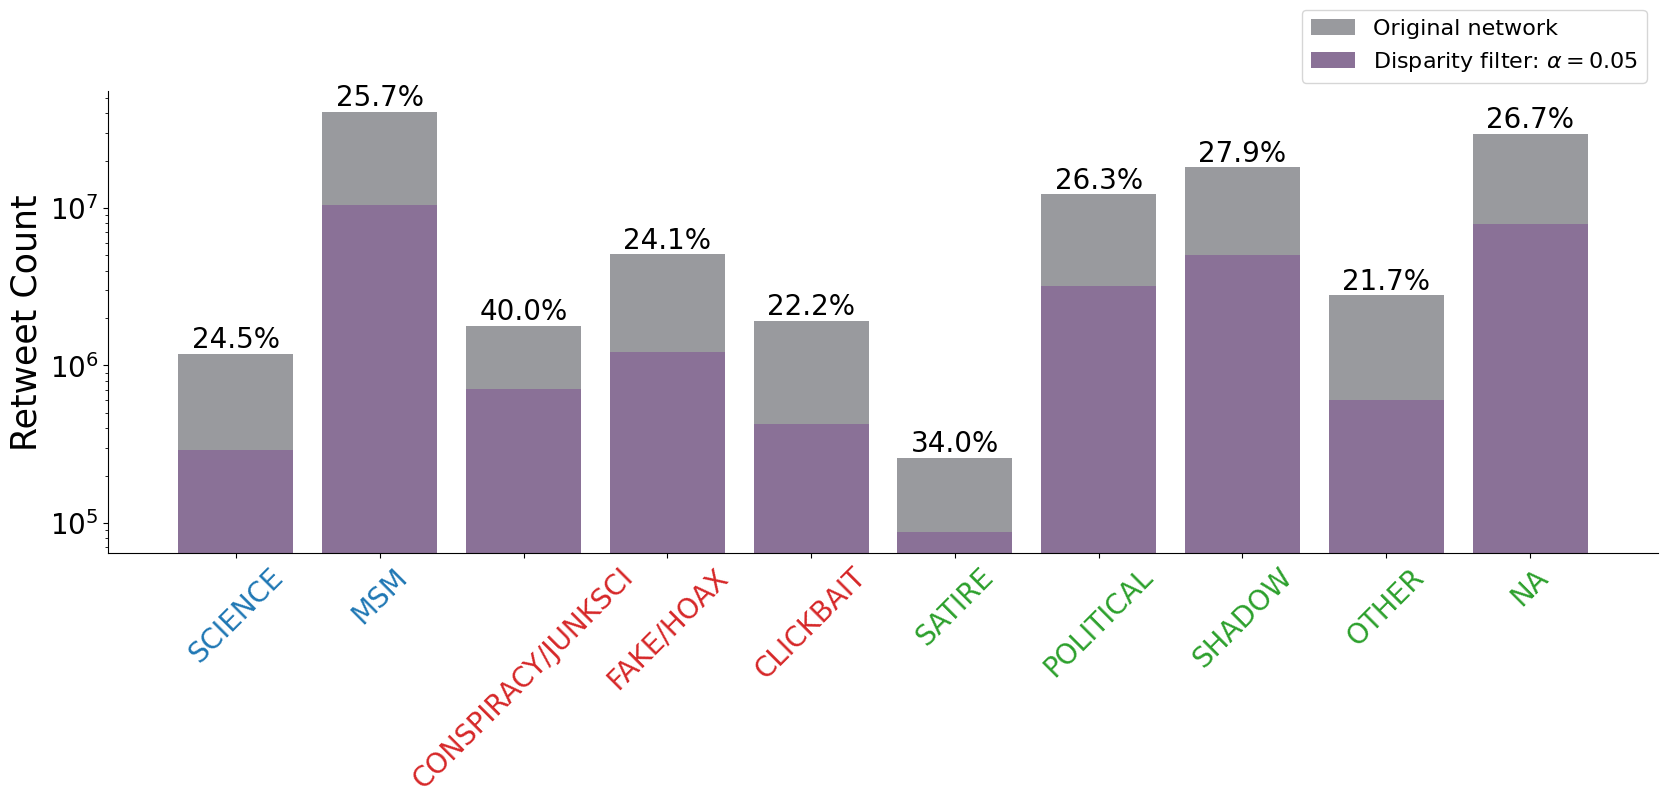

In [175]:
fig, axs = plt.subplots(figsize=(20,6))

X = ['SCIENCE', 'MSM', 'CONSPIRACY/JUNKSCI', 'FAKE/HOAX', 'CLICKBAIT', 'SATIRE', 'POLITICAL', 'SHADOW', 'OTHER', 'NA']
axs.bar(X, [category_counts1[X[i]] for i in range(len(X))], color = '#999A9E', label = "Original network")
axs.bar(X, [category_counts2[X[i]] for i in range(len(X))], color = '#8A7197', label = r"Disparity filter: $\alpha = 0.05$")

plt.xticks(fontsize = 20, rotation = 45); plt.yticks(fontsize = 20)
plt.yscale('log') 
plt.ylabel("Retweet Count", fontsize = 25)

my_colors = ['tab:blue']*2 + ['tab:red']*3 + ['tab:green']*5

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

axs.bar_label(axs.containers[0], labels = [f'{x:.1%}' for x in np.array([category_counts2[X[i]] for i in range(len(X))])/np.array([category_counts1[X[i]] for i in range(len(X))])], fontsize = 20)

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

plt.legend(fontsize = 16, loc='best', bbox_to_anchor=(0.5, 0.7, 0.5, 0.5))
fig.savefig('Figures/Fig1bSM.png', dpi=400)

- Generalised

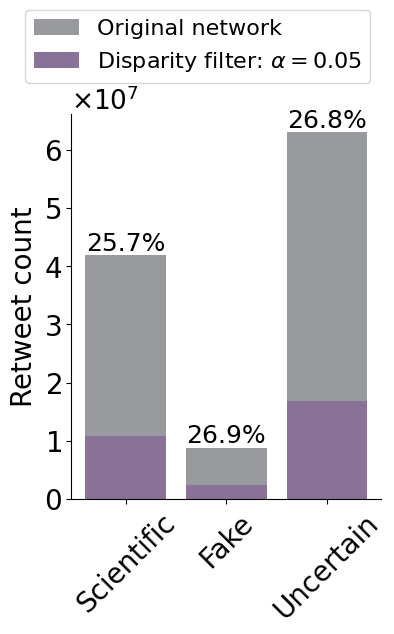

In [202]:
fig, axs = plt.subplots(figsize=(4,5))

X = ['Scientific', 'Fake', 'Uncertain']
axs.bar(X, [G_original_newsGeneralisedCategoryCount[i] for i in range(len(X))], color = '#999A9E', label = "Original network")
axs.bar(X, [G_filtered_newsGeneralisedCategoryCount[i] for i in range(len(X))], color = '#8A7197', label = r"Disparity filter: $\alpha = 0.05$")

plt.xticks(fontsize = 20, rotation = 45); plt.yticks(fontsize = 20)
#plt.yscale('log') 
plt.ylabel("Retweet count", fontsize = 20)

#my_colors = ["tab:blue", "tab:red", "tab:green"]

#for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
#    ticklabel.set_color(tickcolor)

axs.bar_label(axs.containers[0], labels = [f'{x:.1%}' for x in G_filtered_newsGeneralisedCategoryCount/G_original_newsGeneralisedCategoryCount], fontsize = 18)

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

plt.legend(fontsize = 16, loc='best', bbox_to_anchor=(0.5, 0.8, 0.5, 0.5))

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.rc('font', size = 19)

fig.savefig('Figures/Fig1b.png', dpi=400, bbox_inches = 'tight')

# 4. Temporal Distribution

In [159]:
original_timeStamps_dict = nx.get_edge_attributes(G_original, 'timeStamps')
original_timeStamps_arr = np.concatenate(np.array(list(original_timeStamps_dict.values())), axis = None)

In [157]:
filtered_timeStamps_dict = nx.get_edge_attributes(G_filtered, 'timeStamps')
filtered_timeStamps_arr = np.concatenate(np.array(list(filtered_timeStamps_dict.values())), axis = None)

In [205]:
from datetime import datetime

# Define the start and end dates
start_date = datetime.strptime('2020-03-17', '%Y-%m-%d')
end_date = datetime.strptime('2021-05-31', '%Y-%m-%d')

# Calculate the difference in days
difference_in_days = (end_date - start_date).days
difference_in_days 

440

In [208]:
# Define the start and end dates
start_date = datetime.strptime('2020-03-17', '%Y-%m-%d')
end_date = datetime.strptime('2021-11-22', '%Y-%m-%d')

# Calculate the difference in days
difference_in_days = (end_date - start_date).days
difference_in_days 

615

In [216]:
# Define the start and end dates
start_date = datetime.strptime('2020-03-17', '%Y-%m-%d')
end_date = datetime.strptime('2020-12-11', '%Y-%m-%d')

# Calculate the difference in days
difference_in_days = (end_date - start_date).days
difference_in_days 

269

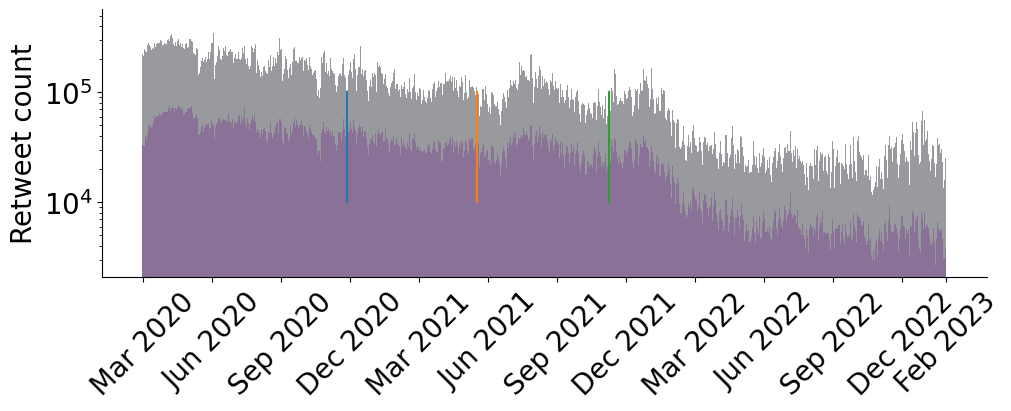

In [220]:
separators = [1584482894 + (i+1) * (60*60*24) for i in range(1062)] #daily

index = [i*91 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]] + [91*11 + 59]
x_tick = ["Mar 2020", "Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Dec 2022", "Feb 2023"]

fig, axs = plt.subplots(figsize = (10,4), constrained_layout = True)

Y, X = np.histogram(original_timeStamps_arr, 1062)
p = plt.bar(X[:-1] + (X[1] - X[0])/2, Y, width = X[1] - X[0], color = '#999A9E', linewidth = 1, label = "Original network")

Y, X = np.histogram(filtered_timeStamps_arr, 1062)
p = plt.bar(X[:-1] + (X[1] - X[0])/2, Y, width = X[1] - X[0], color = '#8A7197', linewidth = 1, label = r"Disparity filter: $\alpha = 0.05$")

plt.plot(2*[np.array(separators)[269]], [10**4, 10**5])
plt.plot(2*[np.array(separators)[440]], [10**4, 10**5])
plt.plot(2*[np.array(separators)[615]], [10**4, 10**5])

plt.xticks(np.array(separators)[index], x_tick, fontsize = 20, rotation = 45) 
plt.yticks(fontsize = 20)
plt.ylabel('Retweet count', fontsize = 20)

plt.yscale('log')

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

fig.savefig('Figures/Fig1c.png', dpi=400)

#plt.legend()